In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

a coefficients:
a 0 : 26.3189450695716
a 1 : 4.00000000000000
a 2 : 0.999999999999997
a 3 : 0.444444444444441
a 4 : 0.249999999999997
a 5 : 0.159999999999997


b coefficients:
b 1 : -12.5663706143592
b 2 : -6.28318530717959
b 3 : -4.18879020478639
b 4 : -3.14159265358979
b 5 : -2.51327412287183


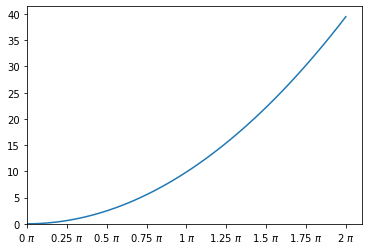

In [70]:
# approximate function f(x)=x^2

p = np.linspace(0, 2*np.pi, 100)
q = p**2

# Fourier approximation
# how many a and b? 
N = 5
ka = np.arange(0, N+1, 1)
kb = np.arange(1, N+1, 1)

# define variables with sympy
x = sympy.symbols('x')

# a0, a1, a2, a3, etc
a_val = []

print('a coefficients:')
for i in range(len(ka)):
    a = (1 / np.pi) * sympy.integrate((x**2 * sympy.cos(ka[i] * x)), (x, 0, 2*np.pi))
    print('a',ka[i],':',a)
    a_val.append(float(a))
print('\n')

a0 = a_val[0]
a_val = a_val[1:]

# b1, b2, b3, b4, etc
b_val = []

print('b coefficients:')
for i in range(len(kb)):
    b = (1 / np.pi) * sympy.integrate((x**2 * sympy.sin(kb[i] * x)), (x, 0, 2*np.pi))
    print('b',kb[i],':',b)
    b_val.append(float(b))

# the fourier function g_N(x)

for j in range(len(a_val)):
    fourier_sum = a_val[j] * 

# a1 * np.cos(1 * p) + b1 * np.sin(1 * p)
# a2 * np.cos(2 * p) + b2 * np.sin(2 * p)
# gN = 0.5 * a[0] * ()
    
# plot

import matplotlib.ticker as tck # needed to print the x axis as ...*pi

plt.plot(p/np.pi, q)
plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.show()

In [73]:
print(len(a_val), len(b_val), len(kb))

5 5 5


In [1]:
hi = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
an = [1, 2, 3]

co = []
for i in range(len(hi)):
    for j in range(len(an)):
        f = hi[i] * an[j]
        co.append(f)

## Fourier Transform for Derivative of a Function

In [27]:
def fourier_derivative_n(f, dx, n): # fourier n-th derivative
    # length of vector f
    nx = f.size
    # initialize k vector up to Nyquist wavenumber
    kmax = np.pi / dx
    dk = kmax / (nx / 2)
    k = np.arange(float(nx))
    k[: int(nx/2)] = k[: int(nx/2)] * dk 
    k[int(nx/2) :] = k[: int(nx/2)] - kmax
    # fourier derivative
    ff = ((1j * k)**n) * np.fft.fft(f)
    df = np.fft.ifft(ff).real
    return(df)

### Test with first, second, and third derivative of periodic function: $f(x)=sin(x)$

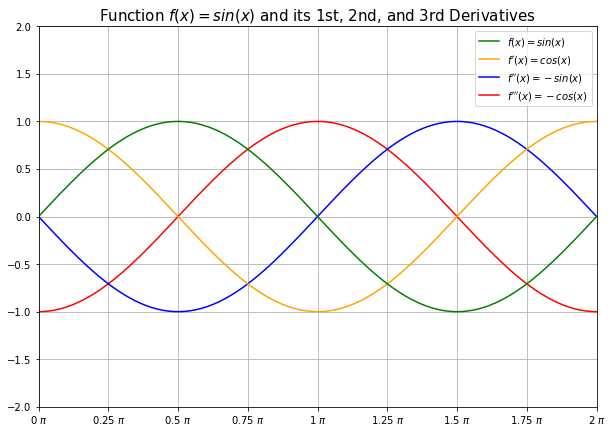

In [102]:
x = np.linspace(0, 2*np.pi, 100)

y0 = np.sin(x)
y1 = np.cos(x) # first derivative
y2 = - np.sin(x) # second derivative
y3 = - np.cos(x) # third derivative

import matplotlib.ticker as tck # needed to print the x axis as ...*pi

# analytical derivative
plt.figure(figsize=(10,7))
p1 = plt.plot(x/np.pi, y3, color='r')
p2 = plt.plot(x/np.pi, y2, color='b')
p3 = plt.plot(x/np.pi, y1, color='orange')
p4 = plt.plot(x/np.pi, y0, color='g')
plt.legend((p4[0], p3[0], p2[0], p1[0]), (["$f(x)=sin(x)$", "$f'(x)=cos(x)$", "$f''(x)=-sin(x)$", "$f'''(x)=-cos(x)$"]))
plt.title('Function $f(x)=sin(x)$ and its 1st, 2nd, and 3rd Derivatives', size=15)
plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.grid('true')
plt.xlim(0, max(x)/np.pi); plt.ylim(-2,2)
plt.show()

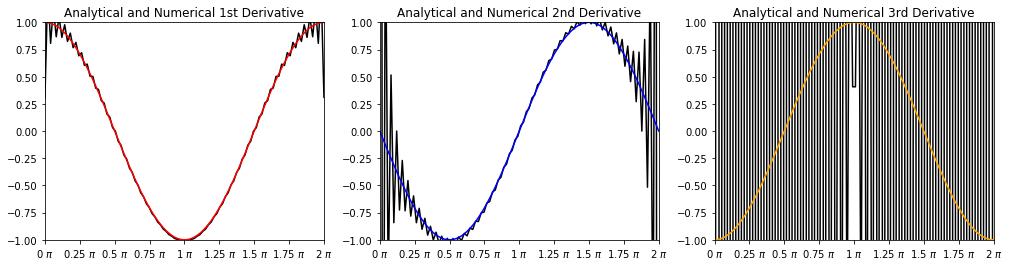

In [99]:
# approximate derivative with DFT
dx = 2*np.pi / 100

y1_dft = fourier_derivative_n(y0, dx, 1) # first derivative
y2_dft = fourier_derivative_n(y0, dx, 2) # second derivative
y3_dft = fourier_derivative_n(y0, dx, 3) # third derivative

plt.figure(figsize=(17,4))

plt.subplot(1,3,1)
plt.plot(x/np.pi, y1_dft, color='black')
plt.plot(x/np.pi, y1, color='red')
plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.title('Analytical and Numerical 1st Derivative')
plt.xlim(0, max(x)/np.pi); plt.ylim(-1,1)

plt.subplot(1,3,2)
plt.plot(x/np.pi, y2_dft, color='black')
plt.plot(x/np.pi, y2, color='blue')
plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.title('Analytical and Numerical 2nd Derivative')
plt.xlim(0, max(x)/np.pi); plt.ylim(-1,1)

plt.subplot(1,3,3)
plt.plot(x/np.pi, y3_dft, color='black')
plt.plot(x/np.pi, y3, color='orange')
plt.gca().xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.title('Analytical and Numerical 3rd Derivative')
plt.xlim(0, max(x)/np.pi); plt.ylim(-1,1)

plt.show()